In [3]:
# Завантажую файл в колаб
import pandas as pd
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print('Uploaded file "{name}" with length {length} bytes'.format(name=filename, length=len(uploaded[filename])))



Saving bestsellers with categories.csv to bestsellers with categories (1).csv
Uploaded file "bestsellers with categories (1).csv" with length 51161 bytes


In [30]:
# Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv("bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [45]:
# Виведіть перші п'ять рядків (використовується функція head)
print(df.head())


                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [32]:
# Виведіть розміри датасету (використовуйте атрибут shape)
print (df.shape)

(550, 7)


In [83]:
# Відповідь: Про скільки книг зберігає дані датасет? 351
df1=df.drop_duplicates(subset=['name'])
df2= df1.shape
df2

(351, 7)

In [53]:
# перейменовуємо колонки

df1.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df1

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


In [54]:
# Знаходження кількості пропусків у кожному стовпці
na_counts = df1.isna().sum()

# Виведення кількості пропусків у кожному стовпці
print(na_counts)


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [ ]:
# Відповідь: Чи є в якихось змінних пропуски? (Так / ні) Вийшло, що ні.

In [55]:
# Отримання унікальних значень у стовпці "genre"
unique_genres = df1['genre'].unique()

# Виведення унікальних значень у стовпці "genre"
print(unique_genres)


['Non Fiction' 'Fiction']


In [ ]:
# Відповідь: Які є унікальні жанри? Так, 'Non Fiction', 'Fiction'

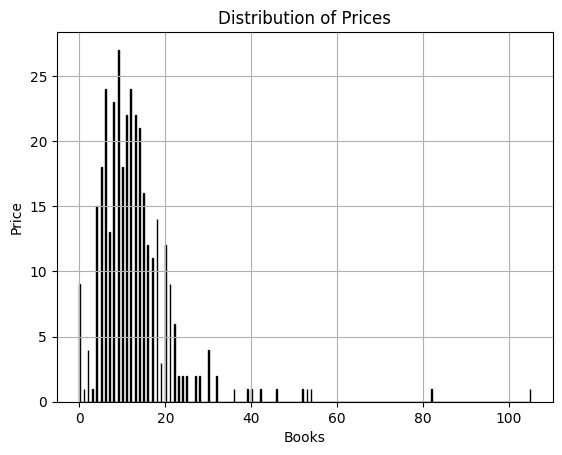

In [56]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
import matplotlib.pyplot as plt

# Побудова гістограми розподілу цін
df1['price'].plot(kind='hist', bins=550, color='skyblue', edgecolor='black')

# Налаштування відображення діаграми
plt.title('Distribution of Prices')
plt.xlabel('Books')
plt.ylabel('Price')
plt.grid(True)

# Відображення графіка
plt.show()


In [58]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
# Описова статистика для стовпця "avg"
median_price = df1["price"].median()
max_price= df1["price"].max()
min_price= df1["price"].min()
mean_price= df1["price"].mean()

# Виведення описової статистики

print(f"median: {median_price}")
print(f"max: {max_price}")
print(f"min: {min_price}")
print(f"mean: {mean_price}")

median: 12.0
max: 105
min: 0
mean: 13.076923076923077


In [85]:
# Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9

max_rating= df1["user_rating"].max()
print (f"Макстмальний рейтинг : {max_rating}")

Макстмальний рейтинг : 4.9


In [84]:
# Відповідь: Скільки книг мають такий рейтинг? Відповідь: 28
count_highest_rating = (df1['user_rating'] == max_rating).sum()
print (f"Найвищий рейтинг мають {count_highest_rating} книг")

Найвищий рейтинг мають 28 книг


In [62]:
# Відповідь: Яка книга має найбільше відгуків? Відповідь: "Where the Crawdads Sing" , author: Delia Owens
max_reviews= df1["reviews"].max()
books_with_max_reviews = df1[df1['reviews'] == max_reviews][['name', 'author']]
print ("Найбільше відгуків:")
print (max_reviews)
print("Назви книг з найвищим рейтингом:")
print(books_with_max_reviews)

Найбільше відгуків:
87841
Назви книг з найвищим рейтингом:
                        name       author
534  Where the Crawdads Sing  Delia Owens


In [86]:
# Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
# Відповідь: Go Set a Watchman: A Novel     19

# Відфільтрування DataFrame за роком видання 2015 та книгами, що потрапили до Топ-50
top_2015 = df1[(df1['year'] == 2015) & (df1['price'])]

# Знаходження книги з найвищою ціною серед цього піднабору
most_expensive_book_2015 = top_2015[top_2015['price'] == top_2015['price'].max()]

# Виведення назви та ціни найдорожчої книги
print("Найдорожча книга у 2015 році:")
print(most_expensive_book_2015[['name', 'price']])





Найдорожча книга у 2015 році:
                           name  price
132  Go Set a Watchman: A Novel     19


In [101]:
# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20
top_50_2010 = df[(df['year'] == 2010) & (df['user_rating'])]
top_fiction_count = top_50_2010[top_50_2010['genre'] == 'Fiction'].shape[0]

print (f"До Top-50 у 2010 році потрапило {top_fiction_count} книг жанру Fiction")


До Top-50 у 2010 році потрапило 20 книг жанру Fiction


In [103]:
# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1
# Відфільтрування DataFrame за умовами рейтингу та року видання
filtered_books = df1[(df1['user_rating'] == 4.9) & (df1['year'].isin([2010, 2011]))]

# Знаходження кількості книг у відфільтрованому DataFrame
num_books = len(filtered_books)

# Виведення результату
print("Кількість книг з рейтингом 4.9, виданих у 2010 або 2011 роках:", num_books)


Кількість книг з рейтингом 4.9, виданих у 2010 або 2011 роках: 1


In [109]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
# Відфільтрування DataFrame за умовами рейтингу та ціни
filtered_books_2015 = df1[(df1['year'] == 2015) & (df['price'] < 8)]

# Сортування за зростанням ціни
sorted_books_2015 = filtered_books_2015.sort_values(by='price', ascending=True)

# Виведення відсортованих книг
print(sorted_books_2015[["name", "price"]])



                                                  name  price
123                               Giraffes Can't Dance      4
28                        Baby Touch and Feel: Animals      5
55   Creative Haven Owls Coloring Book (Adult Color...      5
63                      Dear Zoo: A Lift-the-Flap Book      5
89   Dover Creative Haven Art Nouveau Animal Design...      5
201  Killing Reagan: The Violent Assault That Chang...      5
16   Adult Coloring Book: Stress Relieving Animal D...      6
17      Adult Coloring Book: Stress Relieving Patterns      6
253              Old School (Diary of a Wimpy Kid #10)      7


<ipython-input-109-893647e5532f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_books_2015 = df1[(df1['year'] == 2015) & (df['price'] < 8)]


In [124]:
# Відповідь: Яка книга остання у відсортованому списку? Відповідь: остання книга є з найвищою ціною, оскільки принцип сортування використано ascending= True, тобто по зростанню.
last_row = sorted_books_2015[["name", "price"]].iloc[-1]
last_row



name     Old School (Diary of a Wimpy Kid #10)
price                                        7
Name: 253, dtype: object

In [125]:
# Визначення максимальної та мінімальної ціни для кожного жанру
price_stats = df1.groupby('genre')['price'].agg(['min', 'max'])

# Виведення результатів
print(price_stats)


             min  max
genre                
Fiction        0   82
Non Fiction    0  105


In [ ]:
# Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82
# Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0
# Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105
# Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0


In [127]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
# Створення нового DataFrame з кількістю книг для кожного автора? метод reset_index() оновлює індексацію в новому DataFrame.
author_book_count = df.groupby('author').agg(book_count=('name', 'count')).reset_index()

# Виведення результатів
author_book_count


,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [ ]:
# Відповідь: Якої розмірності вийшла таблиця? Відповідь: (248,2)
print(author_book_count.shape)

(248, 2)


In [134]:
# Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney
# Відповідь: Скільки книг цього автора? Відповідь: 120

max_count=author_book_count["book_count"].max()
books_max_count = author_book_count[author_book_count['book_count'] == max_count]['author']
# Виведення результатів
books_max_count

120    Jeff Kinney
Name: author, dtype: object

In [136]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).

author_book_rating = df1.groupby('author').agg(author_rating=('user_rating', 'mean')).reset_index()

# Виведення результатів
print(author_book_rating)



                         author  author_rating
0              Abraham Verghese           4.60
1                Adam Gasiewski           4.40
2                 Adam Mansbach           4.80
3                     Adir Levy           4.80
4    Admiral William H. McRaven           4.70
..                          ...            ...
243             Walter Isaacson           4.55
244               William Davis           4.40
245            William P. Young           4.60
246            Wizards RPG Team           4.80
247                Zhi Gang Sha           4.60

[248 rows x 2 columns]


In [142]:
# Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:  Donna Tartt, min rating = 3.9
min_rating = author_book_rating ["author_rating"].min()

author_min_rating = author_book_rating[author_book_rating['author_rating'] == min_rating]['author'].values


print (f'Автор з мінімальним рейтингом ({min_rating}): {author_min_rating}')

Автор з мінімальним рейтингом (3.9): ['Donna Tartt']


In [ ]:
# Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9
# Define the particular
author_name = "Donna Tartt"

# Filter the DataFrame for the specific author
author = author_book_rating[author_book_rating['author'] == author_name]

# Find the mean rating for the particular author
mean_rating = author['author_rating'].mean()

# Print the minimum rating

print("The mean rating for", author_name, "is:", mean_rating)


The mean rating for Donna Tartt is: 3.9


In [169]:
concatenated_df = pd.concat([author_book_count, author_book_rating], axis=1)
# Визначаю повторювальні колонки: concatenated_df.columns.duplicated(), ~ (not) зазначаю, що перше входження буде True, решта False, потім вибираю всі рядки і перший стовпець loc(:, ...), що визначили як True
# Пробувала запис : concatenated_df = concatenated_df.drop_duplicates(subset=['author']). НЕ забрало стовпець. ТОму шукала складніші варіанти

concatenated_df = concatenated_df.loc[:,~concatenated_df.columns.duplicated()]
concatenated_df


,author,book_count,author_rating
0,Abraham Verghese,2,4.60
1,Adam Gasiewski,1,4.40
2,Adam Mansbach,1,4.80
3,Adir Levy,1,4.80
4,Admiral William H. McRaven,1,4.70
...,...,...,...
243,Walter Isaacson,3,4.55
244,William Davis,2,4.40
245,William P. Young,2,4.60
246,Wizards RPG Team,3,4.80


In [172]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
# Відсортувати датафрейм за зростаючою кількістю книг та зростаючим рейтингом
sorted_df = concatenated_df.sort_values(by=['book_count', 'author_rating'], ascending=[True, True]).reset_index().drop('index', axis=1)

# Виведення відсортованого датафрейму
print(sorted_df)


                                 author  book_count  author_rating
0                        Muriel Barbery           1           4.00
1                          Chris Cleave           1           4.10
2                     Ian K. Smith M.D.           1           4.10
3                          Pierre Dukan           1           4.10
4                      Elizabeth Strout           1           4.20
..                                  ...         ...            ...
243  American Psychological Association          10           4.50
244                     Suzanne Collins          11           4.68
245                        Gary Chapman          11           4.70
246                        Rick Riordan          11           4.77
247                         Jeff Kinney          12           4.80

[248 rows x 3 columns]


In [173]:
# Відповідь: Який автор перший author_book_rating у списку? Muriel Barbery
first_author = sorted_df.iloc[0]['author']
print("Перший автор у списку:", first_author)


Перший автор у списку: Muriel Barbery


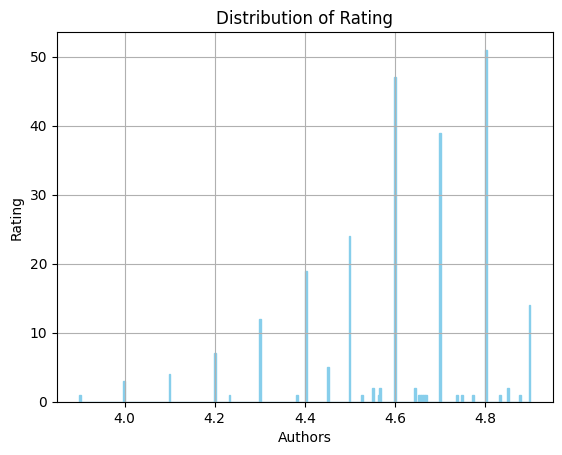

In [ ]:
import matplotlib.pyplot as plt

# Побудова гістограми розподілу рейтингу в різних авторів
sorted_df['author_rating'].plot(kind='hist', bins=248, color='skyblue', edgecolor='skyblue')


# Налаштування відображення діаграми
plt.title('Distribution of Rating')
plt.xlabel('Authors')
plt.ylabel('Rating')
plt.grid(True)

# Відображення графіка
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


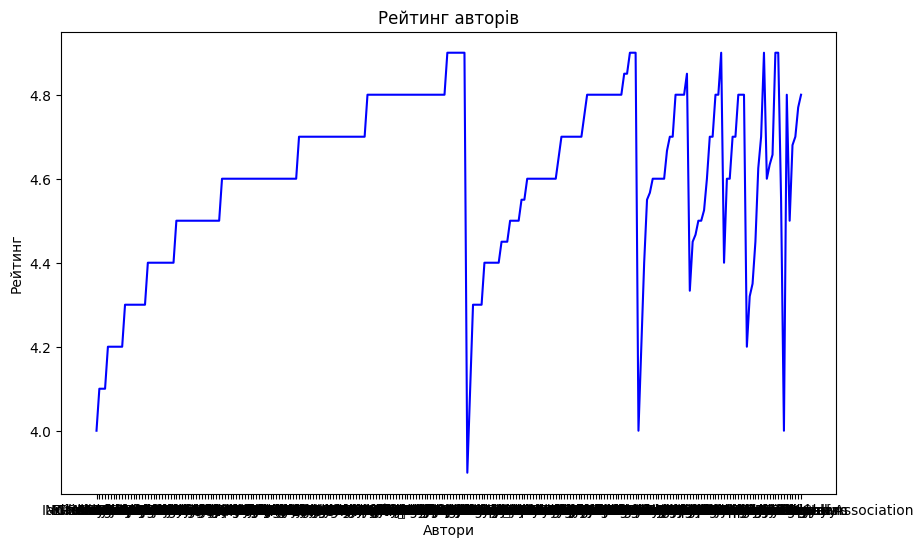

In [174]:
import matplotlib.pyplot as plt

# Загальні дані для побудови діаграми (використовуємо останні п'ять рядків)

# Отримання даних для побудови
data = sorted_df['author_rating']
categories = sorted_df['author']

# Розмір діаграми
plt.figure(figsize=(10, 6))

# Побудова стовпчикової діаграми для однієї ознаки
plt.plot(categories, data, color='blue')  # Використовуємо лише один колір

# Додавання підписів та заголовка
plt.xlabel('Автори')
plt.ylabel('Рейтинг')
plt.title('Рейтинг авторів')

# Відображення діаграми
plt.show()



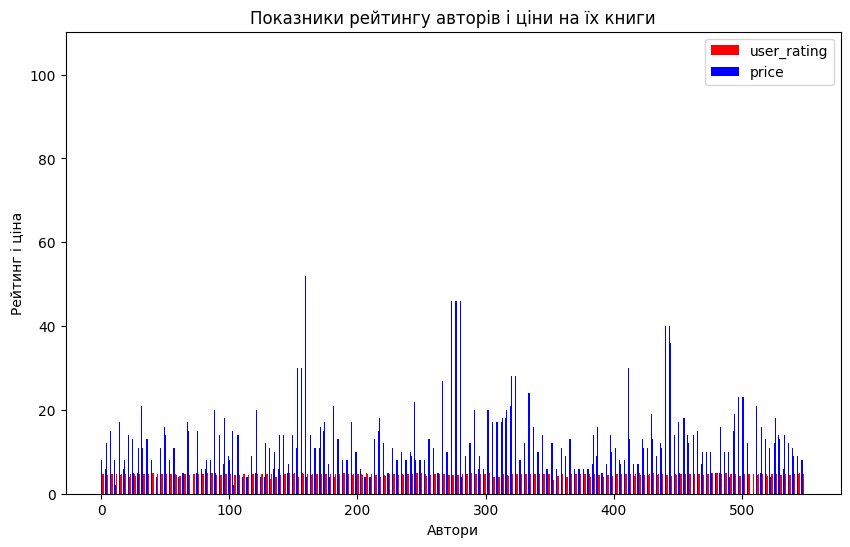

In [175]:
import matplotlib.pyplot as plt

# Отримання даних для побудови
y_red_data = df['user_rating']
y_blue_data = df['price']
x_categories = df['author']

# Розмір діаграми
plt.figure(figsize=(10, 6))

# Генерація зміщення для другого набору даних
bar_width = 0.35
index = range(len(x_categories))

# Побудова стовпчикової діаграми з окремими стовпчиками для кожної ознаки
plt.bar(index, y_red_data, color='red', width=bar_width, label='user_rating')
plt.bar([i + bar_width for i in index], y_blue_data, color='blue', width=bar_width, label='price')

# Додавання підписів та легенди
plt.xlabel('Автори')
plt.ylabel('Рейтинг і ціна')
plt.title('Показники рейтингу авторів і ціни на їх книги')
plt.legend()

# Відображення діаграми
plt.show()


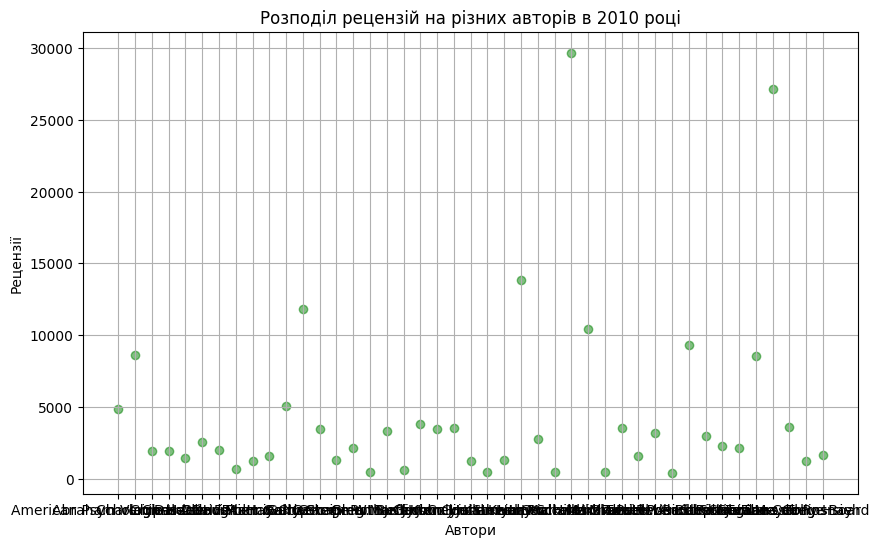

In [176]:
books_2010 = df[df['year'] == 2010]
author_reviews = books_2010.groupby('author').agg(author_reviews=('reviews', 'mean')).reset_index()
x_data = author_reviews['author']  # дані для осі X
y_data = author_reviews['author_reviews']  # дані для осі Y
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Розмір діаграми

plt.scatter(x_data, y_data, color='green', alpha=0.5)  # Побудова точкової діаграми

plt.title('Розподіл рецензій на різних авторів в 2010 році')  # Додавання заголовка
plt.xlabel('Автори')  # Підпис для осі X
plt.ylabel('Рецензії')  # Підпис для осі Y

plt.grid(True)  # Ввімкнення сітки

plt.show()  # Відображення діаграми



